In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
import base64
import urllib.parse
#from wordcloud import WordCloud, STOPWORDS

In [2]:
df_q1 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_03_05.csv.gz")
df_q1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,https://www.airbnb.com/rooms/1368985680426539467,20250305023340,2025-03-12,city scrape,Acogedor y nuevo ático con gran terraza (B),"Cozy penthouse floor with large terrace, locat...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20803102,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
25284,1368986418960986344,https://www.airbnb.com/rooms/1368986418960986344,20250305023340,2025-03-05,city scrape,Elegante apartamento en Madrid!,Have fun with the whole family at this stylish...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25285,1368991577357063431,https://www.airbnb.com/rooms/1368991577357063431,20250305023340,2025-03-10,city scrape,Tropical apartment Madrid,Get away from routine at this unique and relax...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25286,1369034696848967860,https://www.airbnb.com/rooms/1369034696848967860,20250305023340,2025-03-07,city scrape,"Cama 1 de 04, no es hinchable.",Enjoy the comfort and tranquility of this home.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,543251626,...,NaN,NaN,NaN,NaN,f,4,0,0,4,NaN


In [ ]:
df_q1.columns

In [7]:
cols_keep = [
    "id",
    "last_scraped",
    "neighbourhood_group_cleansed",
    "neighbourhood_cleansed",
    "latitude",
    "longitude",
    "room_type",
    "property_type",
    "accommodates",
    "bedrooms",
    "bathrooms_text",
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews"
]

In [8]:
df_q1_15cols = df_q1[cols_keep].copy()
df_q1_15cols = df_q1_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q1_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,2025-03-12,Hortaleza,Canillas,40.464110,-3.647130,Entire home/apt,Entire rental unit,3,1.0,1 bath,$103.00,2,0,0
25284,1368986418960986344,2025-03-05,Carabanchel,San Isidro,40.395983,-3.730953,Entire home/apt,Entire rental unit,5,2.0,1 bath,$100.00,5,365,0
25285,1368991577357063431,2025-03-10,Carabanchel,San Isidro,40.395621,-3.731533,Entire home/apt,Entire rental unit,3,1.0,1 bath,$66.00,5,3,0
25286,1369034696848967860,2025-03-07,Carabanchel,Abrantes,40.383990,-3.727290,Shared room,Shared room in rental unit,1,1.0,1 shared bath,$16.00,1,71,0


In [9]:
df_q2 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_06_12.csv.gz")

In [10]:
df_q2_15cols = df_q2[cols_keep].copy()
df_q2_15cols = df_q2_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q2_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-06-26,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,340,33
1,30320,2025-06-27,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,337,172
2,30959,2025-06-27,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-06-26,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,352,49
4,62423,2025-06-25,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$64.00,1,314,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25999,1440480926395443476,2025-06-25,Arganzuela,Acacias,40.400235,-3.701100,Private room,Private room in rental unit,2,1.0,1 private bath,$30.00,2,64,0
26000,1440487269977127830,2025-06-27,Retiro,Niño Jesús,40.410924,-3.675724,Entire home/apt,Entire rental unit,6,3.0,2 baths,$140.00,31,300,0
26001,1440501514773966682,2025-06-26,Centro,Sol,40.414901,-3.706317,Entire home/apt,Entire rental unit,3,1.0,1 bath,$77.00,1,349,0
26002,1440526432592438393,2025-06-27,Centro,Embajadores,40.410300,-3.703420,Entire home/apt,Entire rental unit,2,1.0,1 bath,$47.00,30,348,0


In [11]:
df_q3 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_09_14.csv.gz")


In [12]:
df_q3_15cols = df_q3[cols_keep].copy()
df_q3_15cols = df_q3_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q3_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-09-15,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,NaN,1 bath,NaN,4,198,33
1,30320,2025-09-15,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,$157.00,5,342,173
2,30959,2025-09-15,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-09-15,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,2,1.0,1 bath,$143.00,5,341,53
4,62423,2025-09-15,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$65.00,1,299,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1508016618526988093,2025-09-14,Retiro,Pacífico,40.401080,-3.676530,Entire home/apt,Entire rental unit,4,1.0,1 bath,$89.00,1,324,0
24996,1508029370917448986,2025-09-15,Centro,Palacio,40.411513,-3.713762,Entire home/apt,Entire rental unit,4,1.0,1 bath,$140.00,4,283,0
24997,1508295390166110966,2025-09-15,Centro,Palacio,40.420770,-3.709950,Entire home/apt,Entire rental unit,4,1.0,1 bath,$150.00,2,362,0
24998,1508573408483646673,2025-09-14,Retiro,Ibiza,40.420882,-3.675472,Entire home/apt,Entire rental unit,2,1.0,1 bath,$38.00,32,364,0


In [13]:
df_all = pd.concat([df_q1_15cols, df_q2_15cols, df_q3_15cols], ignore_index=True)
df_all

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76287,1508016618526988093,2025-09-14,Retiro,Pacífico,40.401080,-3.676530,Entire home/apt,Entire rental unit,4,1.0,1 bath,$89.00,1,324,0
76288,1508029370917448986,2025-09-15,Centro,Palacio,40.411513,-3.713762,Entire home/apt,Entire rental unit,4,1.0,1 bath,$140.00,4,283,0
76289,1508295390166110966,2025-09-15,Centro,Palacio,40.420770,-3.709950,Entire home/apt,Entire rental unit,4,1.0,1 bath,$150.00,2,362,0
76290,1508573408483646673,2025-09-14,Retiro,Ibiza,40.420882,-3.675472,Entire home/apt,Entire rental unit,2,1.0,1 bath,$38.00,32,364,0


In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76292 entries, 0 to 76291
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76292 non-null  int64  
 1   last_scraped       76292 non-null  object 
 2   Distrito           76292 non-null  object 
 3   Barrio             76292 non-null  object 
 4   latitude           76292 non-null  float64
 5   longitude          76292 non-null  float64
 6   room_type          76292 non-null  object 
 7   property_type      76292 non-null  object 
 8   capacidad          76292 non-null  int64  
 9   bedrooms           68775 non-null  float64
 10  bathrooms_text     76209 non-null  object 
 11  price              58307 non-null  object 
 12  minimum_nights     76292 non-null  int64  
 13  availability_365   76292 non-null  int64  
 14  number_of_reviews  76292 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 8.7+ MB


In [26]:
df_all2 = df_all.copy()

df_all2["last_scraped"] = pd.to_datetime(df_all2["last_scraped"], errors="coerce")

df_all2 = (df_all2.sort_values("last_scraped").drop_duplicates(subset=["id"], keep="last").reset_index(drop=True))

df_all2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31231 entries, 0 to 31230
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 31231 non-null  int64         
 1   last_scraped       31231 non-null  datetime64[ns]
 2   Distrito           31231 non-null  object        
 3   Barrio             31231 non-null  object        
 4   latitude           31231 non-null  float64       
 5   longitude          31231 non-null  float64       
 6   room_type          31231 non-null  object        
 7   property_type      31231 non-null  object        
 8   capacidad          31231 non-null  int64         
 9   bedrooms           28286 non-null  float64       
 10  bathrooms_text     31194 non-null  object        
 11  price              24062 non-null  object        
 12  minimum_nights     31231 non-null  int64         
 13  availability_365   31231 non-null  int64         
 14  number

Lo primero que haremos será revisar la columna de noches mínimas por alojamiento para irle dando forma (minimum_nights) 

In [27]:
minimum_nights = df_all2[["minimum_nights"]].sort_values(by="minimum_nights", ascending=False)
minimum_nights

,minimum_nights
29322,1125
15529,1125
30547,1125
24638,1125
27067,1000
...,...
18024,1
31211,1
31210,1
31208,1


In [28]:
df_all2["minimum_nights"].isna().sum()

np.int64(0)

In [ ]:
(df_all2["minimum_nights"] > 365).sum()

np.int64(17)

No tenemos nulos en la columna, sin embargo teneos 17 anuncion que piden más de 365 noches minimas para reservas
Esto suele pasar cuando un anuncion quiere bloquear sin cerrar la disponibildiad para no ver afectado su exposición en Airbnb
Pero eso no lo podemos afirmar eso solo una hipotesis, lo que si podemos decir es que son outliers extremos

In [31]:
df_all2["minimum_nights"].describe(percentiles=[.5,.75,.9,.95,.99])

count    31231.000000
mean         8.904198
std         29.762392
min          1.000000
50%          2.000000
75%          4.000000
90%         30.000000
95%         31.000000
99%         90.000000
max       1125.000000
Name: minimum_nights, dtype: float64

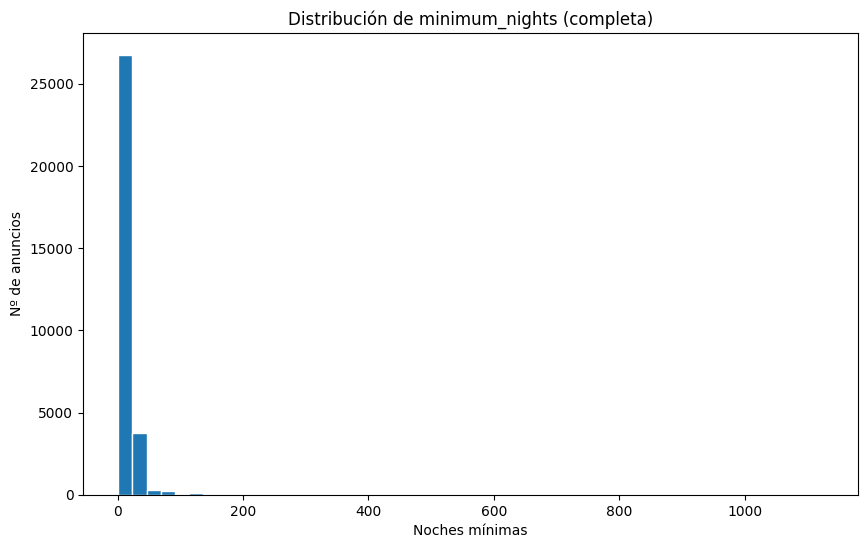

In [40]:
x = df_all2["minimum_nights"]

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, bins=50, edgecolor="white")   # o bins="auto"
ax.set_title("Distribución de minimum_nights (completa)")
ax.set_xlabel("Noches mínimas")
ax.set_ylabel("Nº de anuncios")
plt.show()

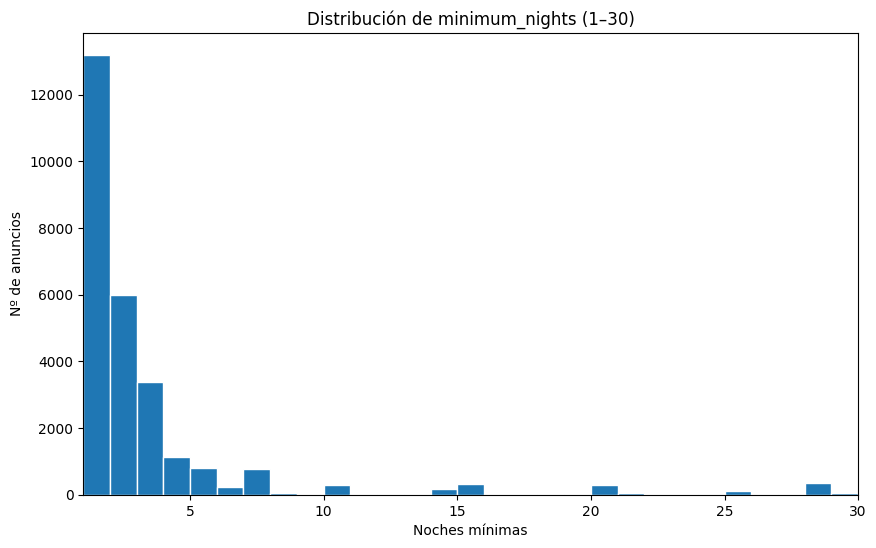

In [42]:
x = df_all2["minimum_nights"]

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, bins=np.arange(1, 32), edgecolor="white")  # 1..30
ax.set_xlim(1, 30)
ax.set_title("Distribución de minimum_nights (1–30)")
ax.set_xlabel("Noches mínimas")
ax.set_ylabel("Nº de anuncios")
plt.show()